<a href="https://colab.research.google.com/github/AnnikaBoodoosingh/MergeTest/blob/main/ResNet_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing **Resnet50**

Extracted Feature Vector Shape: torch.Size([1, 2048, 7, 7])


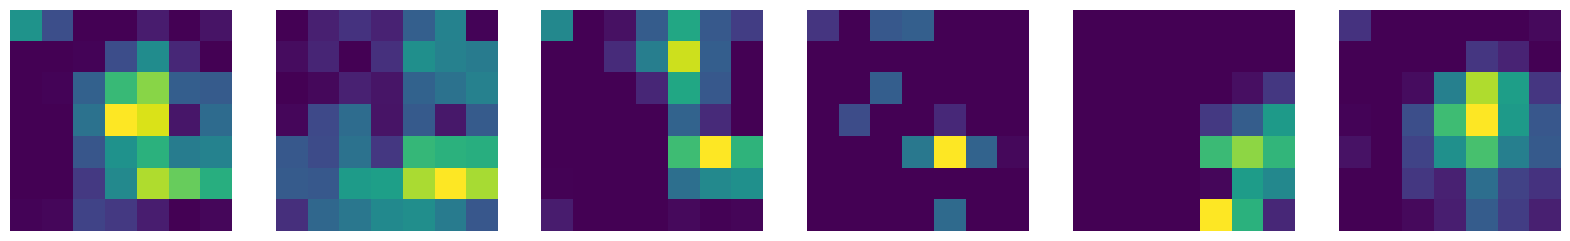

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Load Pretrained ResNet-50
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()  # Set to evaluation mode

# Load and Preprocess Image
image_path = "image_3_diseased.png"  # Use the filename directly
image = Image.open(image_path).convert("RGB")  # Convert image to RGB mode

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Define a hook function to capture features from a specific layer
def hook_fn(module, input, output):
    global features_output
    features_output = output.detach()  # Store the output from this layer

# Register the hook to a specific layer (e.g., 'layer4' of ResNet)
hook = resnet50.layer4[2].register_forward_hook(hook_fn)

# Run the image through the network
with torch.no_grad():
    resnet50(image_tensor)

# Visualize the extracted features (for example, a feature map from a convolutional layer)
print("Extracted Feature Vector Shape:", features_output.shape)

# Plot the feature map of the last layer (you can select any layer)
features_output = features_output.squeeze()  # Remove the batch dimension

# Visualize the feature maps (showing the first 6 feature maps here)
fig, axarr = plt.subplots(1, 6, figsize=(20, 20))
for idx, ax in enumerate(axarr):
    ax.imshow(features_output[idx].cpu(), cmap='viridis')  # Feature map channels
    ax.axis('off')
plt.show()

# Remove the hook after use
hook.remove()